### logistic Regression
1. Data preparation
2. Visualization
3. Create train and test
4. Create Logistic Regression Model
5. Predictions 
6. Decision boundary
7. how to use sk learn

In [1]:
# data generate using numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean01=np.array([1,0.5])
cov01=np.array([[1,0.1],[0.1,1.2]])
mean02=np.array([4,5])
cov02=np.array([[1.2,0.1],[0.1,1.3]])

dist01=np.random.multivariate_normal(mean01,cov01,500)
dist02=np.random.multivariate_normal(mean02,cov02,500)


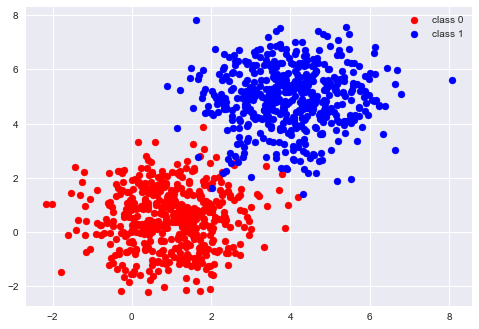

In [7]:
plt.style.use('seaborn')
plt.scatter(dist01[:,0],dist01[:,1],color="red",label="class 0")
plt.scatter(dist02[:,0],dist02[:,1],color="blue",label="class 1")
plt.legend()
plt.show()

In [9]:
# matrix to store all elements of both class
data=np.zeros((1000,3))


In [11]:
data[:500,:2]=dist01
data[500:,:2]=dist02

# to assign class 1 to dist02
data[500:,-1]=1.0

In [13]:
np.random.shuffle(data)
data

array([[ 1.30431063,  0.50153681,  0.        ],
       [ 1.05915856,  1.06814192,  0.        ],
       [ 1.59389551,  0.59881157,  0.        ],
       ...,
       [ 4.88425597,  4.76342029,  1.        ],
       [ 1.92957368, -1.2435592 ,  0.        ],
       [ 4.54392337,  6.11342136,  1.        ]])

In [14]:
# divide the data into train test split
from sklearn.model_selection import train_test_split


In [60]:
x_train, x_test, y_train, y_test=train_test_split(data[:,:-1],data[:,-1],random_state=2)

In [61]:
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((750, 2), (250, 2), (750,), (250,))

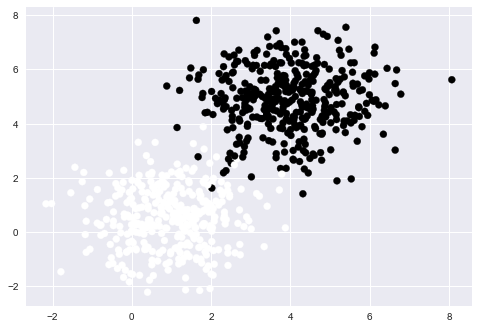

In [62]:

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
# c=y_train mark the color according to y_train 
plt.show()

In [63]:
# data normalization
x_mean=x_train.mean(axis=0)  # axis 0 means row and axis 1 is column , meaning we are doing mean of all rows of col1 and col2 
x_mean

array([2.50638405, 2.7558427 ])

In [64]:
x_std=x_train.std(axis=0)

x_train=(x_train-x_mean)/x_std



In [66]:
x_test=(x_test-x_mean)/x_std

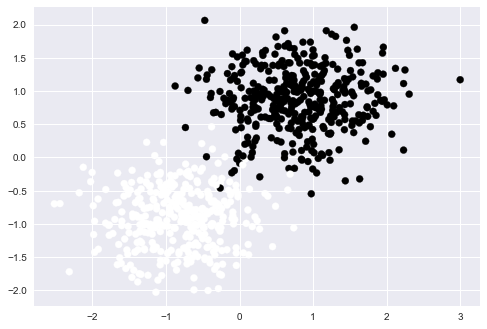

In [67]:

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

plt.show()
# axis values are now in range 

In [68]:
x_train.std(axis=0),x_test.std(axis=0)


(array([1., 1.]), array([0.9802383 , 1.03627397]))

## Logistic Regression Implementation

In [79]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(x,theta):
    """
    x- entire array(m,n+1)  n+1 because adding a dummy feature of 1
    theta- array(n+1,1)
    """
    return sigmoid(np.dot(x,theta));

def error(x,y,theta):
    hi=hypothesis(x,theta)
    e=-1*np.mean((y*np.log(hi))-((1-y)*np.log(1-hi)))
    return e

In [91]:
def gradient(x,y,theta):
    hi=hypothesis(x,theta)
    grad=-np.dot(x.T,(y-hi))
    m=x.shape[0]
    return grad/m

def gradient_descent(x,y,lr=0.5,max_itr=500):
    n=x.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range (max_itr):
        err=error(x,y,theta)
        error_list.append(err)
        grad=gradient(x,y,theta)
        theta=theta-lr*grad
    return theta,error_list    
    
    

In [92]:
ones=np.ones((x_train.shape[0],1))
new_x_train=np.hstack((ones,x_train))
new_x_train.shape
y_train=y_train.reshape((-1,1))

In [93]:
theta,error_list=gradient_descent(new_x_train,y_train)

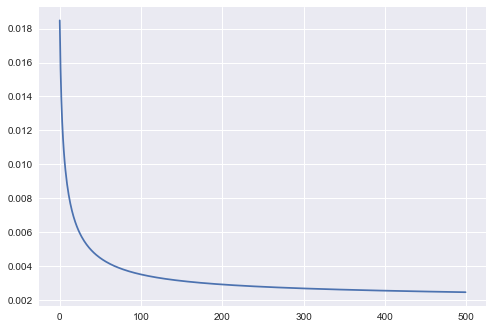

In [94]:
plt.plot(error_list)

In [95]:
theta

array([[0.36709168],
       [3.15808583],
       [4.51245365]])

### visualize the decision surface

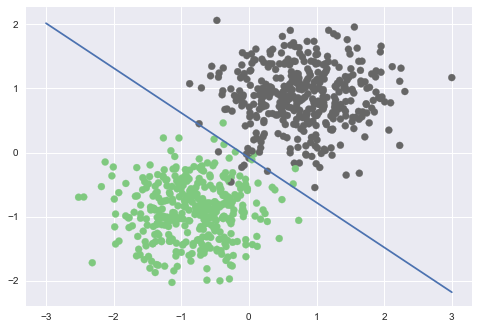

In [100]:
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.reshape((-1)),cmap=plt.cm.Accent)

### predictions and accuracy

In [108]:
def predict(x,theta):
    h=hypothesis(x,theta)
    output=np.zeros(h.shape)
    output[h>=0.5]=1
    output.astype('int')
    
    return output
x_train_pred=predict(new_x_train,theta)

In [109]:
ones=np.ones((x_test.shape[0],1))
new_x_test=np.hstack((ones,x_test))
new_x_test.shape
y_test=y_test.reshape((-1,1))

In [110]:
x_test_pred=predict(new_x_test,theta)

In [115]:
def accuracy(actual,pred):
    actual=actual.astype('int')
    actual=actual.reshape((-1,1))
    acc=np.sum(actual==pred)/actual.shape[0]
    return acc*100

In [116]:
accuracy(y_train,x_train_pred)


98.66666666666667

In [118]:
accuracy(y_test,x_test_pred)

99.2

## how to use sklearn

In [123]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [127]:
model.fit(x_train,y_train)

/Users/abhaydeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [131]:
theta0=model.intercept_
thetas=model.coef_
theta0,thetas

(array([0.363391]), array([[2.87477862, 4.23597524]]))

In [132]:
model.score(x_train,y_train)

0.9853333333333333

In [133]:
model.score(x_test,y_test)

0.992